There are several popular time series data models that are used for forecasting in different industries and applications. Here are some of the latest time series data models that are being used by data scientists and analysts:

Prophet: Prophet is a popular open-source time series data model developed by Facebook that is designed to be easy to use and provide accurate forecasts. It uses a Bayesian framework to model the trend, seasonality, and holiday effects, and provides uncertainty intervals for the forecast. It also supports outlier detection and trend changepoints.

DeepAR: DeepAR is a deep learning model developed by Amazon that is designed for multivariate time series forecasting. It uses a recurrent neural network (RNN) to model the temporal dependencies in the data and is particularly effective for long-term forecasts. It also supports dynamic features, such as weather or economic indicators, which can improve the accuracy of the forecast.

SARIMA: Seasonal Autoregressive Integrated Moving Average (SARIMA) is a traditional time series model that is widely used for forecasting in industries such as finance, economics, and engineering. It models the autoregressive (AR), integrated (I), and moving average (MA) components of the data, as well as the seasonality. It is particularly effective for stationary time series data, which exhibit a constant mean and variance.

VAR: Vector Autoregression (VAR) is a statistical model that is used for multivariate time series forecasting. It models the dependencies between multiple time series variables and is particularly effective for applications such as economic forecasting, where multiple economic indicators are used to predict the behavior of the market.

LSTM: Long Short-Term Memory (LSTM) is a type of RNN that is particularly effective for modeling long-term dependencies in time series data. It has been used successfully in applications such as speech recognition, natural language processing, and image recognition. In the context of time series forecasting, LSTM can be used to model the trend and seasonality of the data, as well as any nonlinear relationships that may exist.

In [76]:
import io, os, sys, setuptools, tokenize

In [2]:
!pip install prophet
import prophet

### 1. univariate 

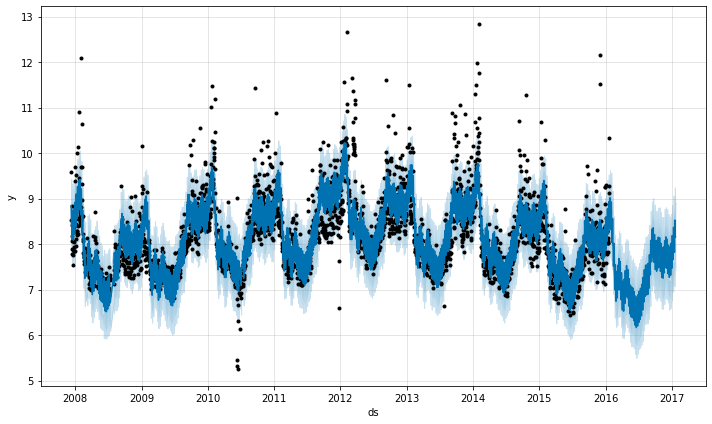

In [77]:
import pandas as pd
import prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the example dataset
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')

# Create a Prophet model and fit it to the data
model = prophet.Prophet()
model.fit(df)

# Make predictions for the next year
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)


In [6]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
 date = '2018-%02d' % i
 future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

In [7]:
future

,ds
0,2018-01-01
1,2018-02-01
2,2018-03-01
3,2018-04-01
4,2018-05-01
5,2018-06-01
6,2018-07-01
7,2018-08-01
8,2018-09-01
9,2018-10-01


          ds      yhat  yhat_lower  yhat_upper
0 2018-01-01  7.777408    7.172883    8.366800
1 2018-02-01  7.730825    7.151240    8.380317
2 2018-03-01  6.223884    5.614293    6.868602
3 2018-04-01  6.193229    5.586731    6.863831
4 2018-05-01  6.485733    5.847020    7.102192


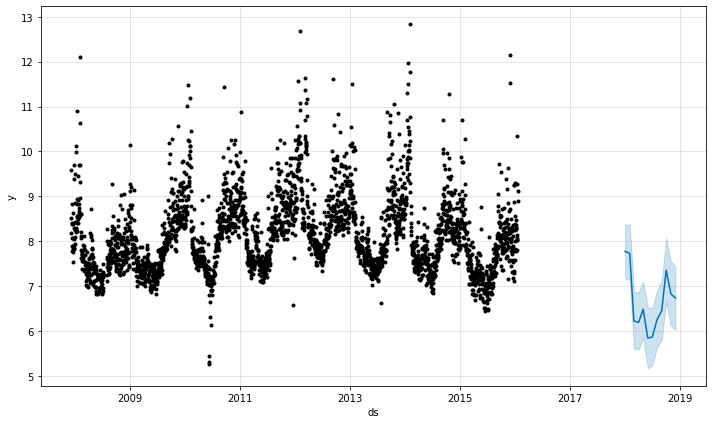

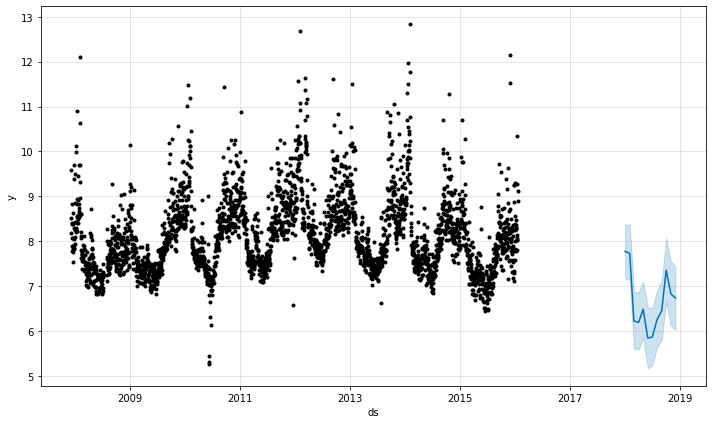

In [8]:
# forecast to future data assumed above
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)


In [9]:
# summarize the forecast
forecast['y']=df['y']
print(forecast[['ds','y','yhat', 'yhat_lower', 'yhat_upper']].head())

          ds         y      yhat  yhat_lower  yhat_upper
0 2018-01-01  9.590761  7.777408    7.172883    8.366800
1 2018-02-01  8.519590  7.730825    7.151240    8.380317
2 2018-03-01  8.183677  6.223884    5.614293    6.868602
3 2018-04-01  8.072467  6.193229    5.586731    6.863831
4 2018-05-01  7.893572  6.485733    5.847020    7.102192


Prophet is a time-series forecasting model developed by Facebook. The model is known for its ability to handle trend changes, seasonality, and outliers in time-series data. To evaluate the accuracy of the Prophet model, you can use the following techniques:

Split your data into training and testing sets: Before training the model, split your data into two parts: training set and testing set. You can use the training set to train the model and the testing set to evaluate its performance.

Use performance metrics: There are several performance metrics that you can use to evaluate the accuracy of the Prophet model. Some common metrics are Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE).

Compare the model's performance against a baseline model: You can compare the Prophet model's performance against a simple baseline model that predicts the next value to be the same as the current value. This can give you an idea of whether the Prophet model is providing any significant improvement over the baseline.

Visualize the model's predictions: Plotting the actual values and the predicted values can help you to see how well the model is fitting the data. You can also plot the residuals (the differences between the actual and predicted values) to see if there are any patterns in the errors.

Cross-validation: You can also use cross-validation techniques, such as k-fold cross-validation, to evaluate the model's performance on different subsets of the data. This can help you to get a better estimate of the model's performance on unseen data.

By using these techniques, you can get a good understanding of the accuracy of the Prophet model and determine whether it is suitable for your time-series forecasting problem.

In [ ]:
df

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_0_4ojf/b7oor24f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_0_4ojf/2gtbvp7k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12628', 'data', 'file=/tmp/tmpc_0_4ojf/b7oor24f.json', 'init=/tmp/tmpc_0_4ojf/2gtbvp7k.json', 'output', 'file=/tmp/tmpc_0_4ojf/prophet_modelvh09h8la/prophet_model-20230217012648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error (MAE): 0.64
Mean Squared Error (MSE): 0.58
Root Mean Squared Error (RMSE): 0.76


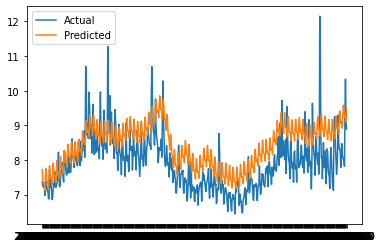

In [10]:
## Knowing accuracy 
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

# Create the Prophet model and fit it to the training data
model = prophet.Prophet()
model.fit(train)

# Make predictions on the test data
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)[-len(test):]

# Compute the performance metrics
mae = mean_absolute_error(test['y'], forecast['yhat'])
mse = mean_squared_error(test['y'], forecast['yhat'])
rmse = np.sqrt(mse)
# Print the performance metrics
print('Mean Absolute Error (MAE): {:.2f}'.format(mae))
print('Mean Squared Error (MSE): {:.2f}'.format(mse))
print('Root Mean Squared Error (RMSE): {:.2f}'.format(rmse))

# Plot the actual and predicted values
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(test['ds'], forecast['yhat'], label='Predicted')
plt.legend()
plt.show()

## holiday effect

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_0_4ojf/yukdo1cu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc_0_4ojf/wqjy1kzo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32119', 'data', 'file=/tmp/tmpc_0_4ojf/yukdo1cu.json', 'init=/tmp/tmpc_0_4ojf/wqjy1kzo.json', 'output', 'file=/tmp/tmpc_0_4ojf/prophet_modelttkhiwt7/prophet_model-20230217012656.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


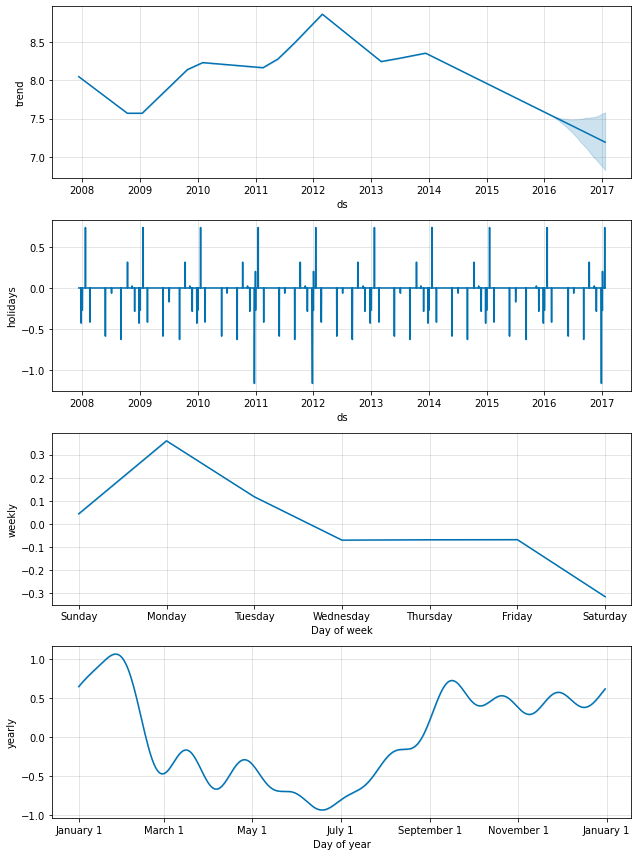

In [11]:
# Add the holidays to the model
model = prophet.Prophet()
model.add_country_holidays(country_name='US')   #add_seasonality()

# Fit the model to the data
model.fit(df)

# Make a forecast
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot the holiday effects
fig = model.plot_components(forecast)


## all effecs with accuracy 

In [ ]:
# Add holidays to the model
model =prophet.Prophet()
model.add_country_holidays(country_name='US')

# Add weekly and yearly seasonality to the model
model.add_seasonality(name='weekly', period=7, fourier_order=5)
model.add_seasonality(name='yearly', period=365.25, fourier_order=10)

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

# Fit the model to the training data
model.fit(train)

# Make predictions on the test data
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)[-len(test):]

# Compute the performance metrics
mae = mean_absolute_error(test['y'], forecast['yhat'])
mse = mean_squared_error(test['y'], forecast['yhat'])
rmse = np.sqrt(mse)

# Print the performance metrics
print('Mean Absolute Error (MAE): {:.2f}'.format(mae))
print('Mean Squared Error (MSE): {:.2f}'.format(mse))
print('Root Mean Squared Error (RMSE): {:.2f}'.format(rmse))

# Plot the actual and predicted values
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(test['ds'], forecast['yhat'], label='Predicted')
plt.legend()
plt.show()

# Plot the components of the model
model.plot_components(forecast)


## # 2. regressor coefficient

In [151]:
df.head(2)

,ds,y,cov
0,2007-12-10,9.590761,1
1,2007-12-11,8.519590,1


In [187]:

# Add holidays to the model
model =prophet.Prophet()
model.add_country_holidays(country_name='US')

# Add weekly and yearly seasonality to the model
model.add_seasonality(name='weekly', period=7, fourier_order=5)
model.add_seasonality(name='yearly', period=365.25, fourier_order=10)

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

# Fit the model to the training data
model.fit(df).predict()


## 3.1 adding new covariate

In [ ]:
# future_dates = model.make_future_dataframe(periods=24, freq='H')  # hourly forecast
future_dates = model.make_future_dataframe(periods=365, freq='M')  # Monthly forecast
future_dates['cov']=np.random.choice([1,2,3], len(future_dates)) # if covariate trained 
forecast = model.predict(future_dates)
future_dates
forecast

In [211]:
# df['cov']= pd.Series(np.random.choice([1,2,3], len(df)), index=pd.to_datetime(df.ds))
df['cov']=np.random.choice([1,2,3], len(df))
df.head(2)

,ds,y,cov
0,2007-12-10,9.590761,1
1,2007-12-11,8.519590,3


In [ ]:
# Add holidays to the model
model =prophet.Prophet(daily_seasonality=False, interval_width=0, mcmc_samples=0, uncertainty_samples=0)
model.add_regressor('cov', mode = "additive")
#model.add_country_holidays(country_name='US')
fit_data=model.fit(df).predict()
# Plot the components of the model
model.plot_components(fit_data)

In [213]:
fit_data['cov'].describe()

count    2.905000e+03
mean    -8.837834e-20
std      8.432245e-04
min     -1.051008e-03
25%     -1.051008e-03
50%     -1.251200e-05
75%      1.025984e-03
max      1.025984e-03
Name: cov, dtype: float64

In [ ]:
# Plot components
fig = model.plot_components(fit_data)

## Data generate 

In [215]:
df.head(2)

,ds,y,cov
0,2007-12-10,9.590761,1
1,2007-12-11,8.519590,3


Testing the hypothesti 
# Define the null hypothesis that the covariate has no effect (i.e., its coefficient is zero)



In [225]:
#import statsmodels.api as sm
null_hypothesis = 0  # no effect of variable 'covariate = 0'

In [232]:
from scipy.stats import ttest_1samp
# find mean and standard deviation of covariats 
average_value=fit_data['cov'].mean()
STD_value=fit_data['cov'].std()
tset, pval = ttest_1samp(fit_data['cov'], 0)
print('p-value',pval)
if pval>0.05:
  print(f'The covariate has insignificant relation, the p-value is {pval}')
else:
  print(f'The covariate has significant relation, the p-value is {pval}')

p-value 0.9999999999999956
The covariate has insignificant relation, the p-value is 0.9999999999999956


In [230]:
fit_data.head(2)

,ds,trend,additive_terms,cov,extra_regressors_additive,weekly,yearly,multiplicative_terms,yhat
0,2007-12-10,8.039970,0.801847,-0.001051,-0.001051,0.352267,0.450631,0.0,8.841817
1,2007-12-11,8.038433,0.554004,0.001026,0.001026,0.119608,0.433370,0.0,8.592437


## multivariate case

In [ ]:
https://github.com/vonum/multi-prophet

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_retail_sales.csv')


df = df.rename(columns={'ds': 'ds', 'y': 'y', 't': 'trend', 'holidays': 'holidays', 'extra_regressors': 'regressors'})
df

Bosttraps 

In [ ]:
import pandas as pd
from fbprophet import Prophet

# Load data
df = pd.read_csv('example.csv')

# Create model with covariates
m = Prophet()
m.add_regressor('covariate')

# Fit model
m.fit(df)

# Perform bootstrap sampling
bootstraps = []
for i in range(100):
    # Sample with replacement from the original data
    boot = df.sample(frac=1, replace=True)
    # Fit model to bootstrap sample
    m_b = Prophet()
    m_b.add_regressor('covariate')
    m_b.fit(boot)
    bootstraps.append(m_b)

# Compute p-value for each covariate
p_values = []
for covariate in ['covariate']:
    # Extract effect of covariate from each bootstrap sample
    effects = [m_b.params[covariate] for m_b in bootstraps]
    # Compute p-value as proportion of bootstrap samples where effect is greater than zero
    p_value = sum([1 for effect in effects if effect > 0]) / len(effects)
    p_values.append(p_value)

# Print p-values
for i, covariate in enumerate(['covariate']):
    print('%s p-value: %.3f' % (covariate, p_values[i]))


OLS

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load data
data = pd.read_csv('example.csv')

# Define predictors and response variable
X = data[['predictor1', 'predictor2', 'predictor3']]
y = data['response']

# Fit linear regression model
model = sm.OLS(y, sm.add_constant(X)).fit()

# Compute variable importance
importance = model.params.abs() / model.params.abs().sum()

# Compute p-values
p_values = model.pvalues[1:]

# Print results
print('Variable importance:')
print(importance)
print('\nP-values:')
print(p_values)
